<a href="https://colab.research.google.com/github/2303a510d6/ADM/blob/main/assignment%203.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

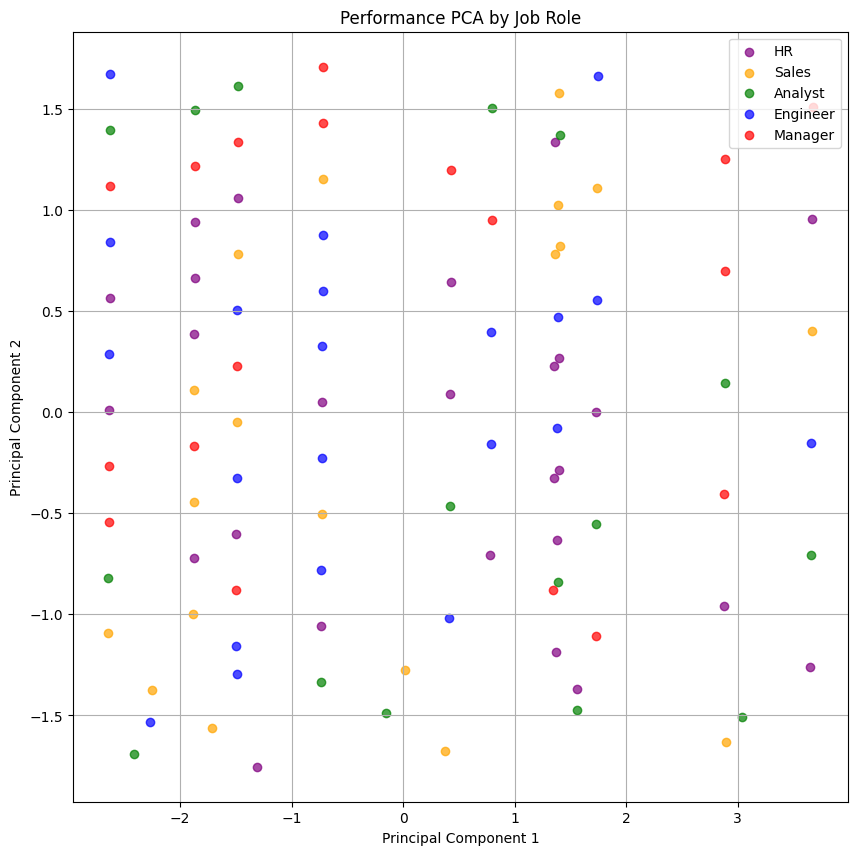

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv("/content/employee_performance.csv")

# Generate a random 'Job Role' column for demonstration
np.random.seed(42)
job_roles = ['Manager', 'Engineer', 'Analyst', 'HR', 'Sales']
data['Job Role'] = np.random.choice(job_roles, size=len(data))

# Standardize the data (excluding the non-numeric 'Job Role' column)
data_numeric = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df['Job Role'] = data['Job Role']  # Add Job Role back

# Scatter plot
plt.figure(figsize=(10, 10))
colors = {'Manager': 'red', 'Engineer': 'blue', 'Analyst': 'green', 'HR': 'purple', 'Sales': 'orange'}
for role in df['Job Role'].unique():
    subset = df[df['Job Role'] == role]
    plt.scatter(subset['PC1'], subset['PC2'], label=role, alpha=0.7, color=colors[role])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Performance PCA by Job Role')
plt.legend()
plt.grid()
plt.show()